In [5]:
## Bibliotecas

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.models import load_model
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

import joblib

In [6]:
## Carregando Informações da PETR3

acao = 'PETR3'

modelo_base = load_model('Modelo_VALE3.keras')
modelo_base.compile(optimizer='adam', loss='mse')

X_train = np.load(f'X_train_{acao}.npy')
y_train = np.load(f'y_train_{acao}.npy')
X_test = np.load(f'X_test_{acao}.npy')
y_test = np.load(f'y_test_{acao}.npy')
y_real = np.load(f'y_real_{acao}.npy')
scaler = joblib.load(f'scaler_{acao}.pkl')

In [37]:
## Aplicação do Transfer Learning + Treinamento

modelo_transferido = modelo_base

modelo_transferido.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 5.1824e-05 - val_loss: 0.0029
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.8130e-05 - val_loss: 0.0029
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.5094e-05 - val_loss: 0.0040
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.8363e-05 - val_loss: 0.0027
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.9177e-05 - val_loss: 0.0027
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.8826e-05 - val_loss: 0.0038
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.3941e-05 - val_loss: 0.0038
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.2394e-05 - val_loss: 0.0029
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.6574e-05 - val_loss: 0.0050
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 4.9206e-05 - val_loss: 0.0038
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.9584e-05 - val_loss: 0.0036
Epoch 12/20
57/57 ━

In [43]:
## Predição e Desnormalização

y_pred = modelo_transferido.predict(X_test)

y_pred_real = scaler.inverse_transform(np.concatenate([y_pred, np.zeros((len(y_pred), scaler.n_features_in_ - 1))], axis=1))[:, 0]

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [44]:
## Métricas

print("MAE:", mean_absolute_error(y_real, y_pred_real))
print("MAPE:", mean_absolute_percentage_error(y_real, y_pred_real))
print("R²:", r2_score(y_real, y_pred_real))

MAE: 2.1758851311720395
MAPE: 0.06231114915775638
R²: 0.5265903575384268


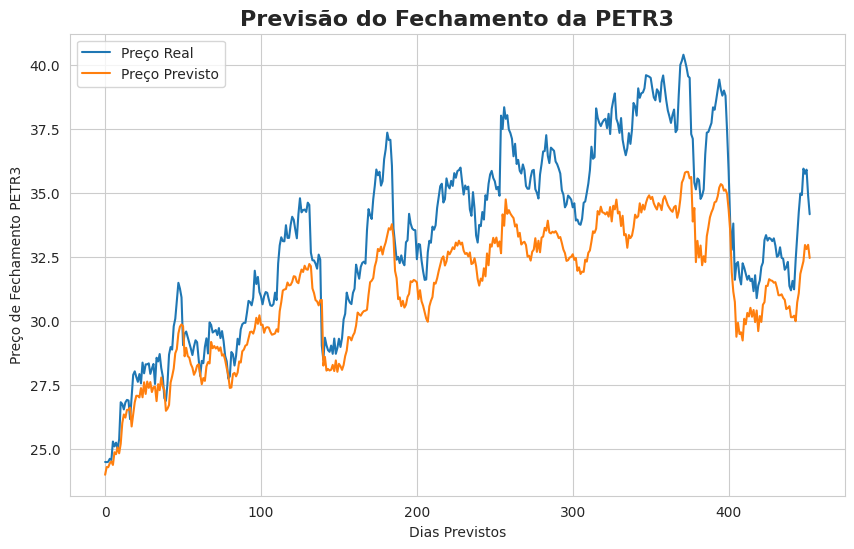

In [40]:
## Gráfico

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
plt.plot(y_real, label='Preço Real')
plt.plot(y_pred_real, label='Preço Previsto')
plt.xlabel('Dias Previstos')
plt.ylabel(f'Preço de Fechamento {acao}')
plt.title(f'Previsão do Fechamento da {acao}', fontweight='bold', fontsize=16)
plt.legend()
plt.show()

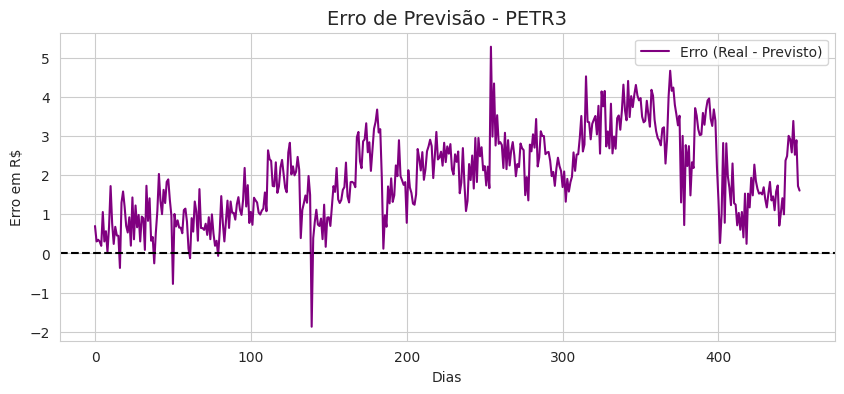

In [36]:
plt.figure(figsize=(10, 4))
sns.set_style('whitegrid')

erro = y_real.flatten() - y_pred_real.flatten()  # Garante que são vetores 1D

plt.plot(erro, label='Erro (Real - Previsto)', color='purple')
plt.axhline(0, color='black', linestyle='--')

plt.title(f'Erro de Previsão - {acao}', fontsize=14)
plt.xlabel('Dias')
plt.ylabel('Erro em R$')
plt.legend()
plt.show()